In [1]:
#This is the notebook for Lab 2 - Computer Vision

#importing the lbraries at the top

import matplotlib.pyplot as plt
import cv2
import numpy as np


In [2]:
#Question 1 :: Finding the KeyParameters and descriptors for the image

In [3]:
#reading the image here
q1_input = cv2.imread("syd_house.jpg")

#q1_input = q1_input.astype('uint8')

#q1_input.shape

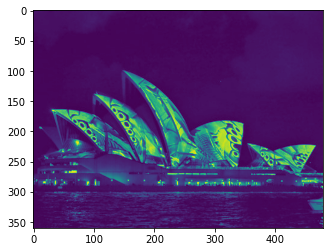

In [4]:
#Printing the image

gray = cv2.cvtColor(q1_input,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
#plt.imshow(cv2.cvtColor(q1_input, cv2.COLOR_BGR2RGB))

In [5]:
#now using the default parameters for sift

default_sift = cv2.xfeatures2d.SIFT_create()

In [6]:
key_points, descriptor = default_sift.detectAndCompute(gray,None)

In [7]:
q1_result = cv2.drawKeypoints(gray,key_points,q1_input)

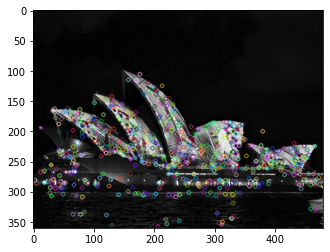

In [8]:
#The output of the image is as follows :

plt.imshow(q1_result)

In [9]:
#We are priting the default key points of the image
len(key_points)

703

In [10]:
cv2.imwrite('Default_key_Points.jpg',q1_result)

True

In [11]:
#key points values = 840
# default_sift = cv2.xfeatures2d.SIFT_create(
#             nfeatures=0,
#             nOctaveLayers=3,
#             contrastThreshold=0.100,
#             edgeThreshold=5,
#             sigma=1
# )

#the sift we are using for the reduced keypoints
default_sift = cv2.xfeatures2d.SIFT_create(
            nfeatures=176,
            nOctaveLayers=3,
            contrastThreshold=0.06,
            edgeThreshold=10,
            sigma=1.6
)


True

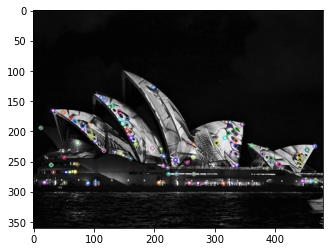

In [12]:
key_points_changed, descriptor_changed = default_sift.detectAndCompute(gray,None)
q1_input_result = cv2.drawKeypoints(gray,key_points_changed,q1_input)
plt.imshow(q1_input_result)

cv2.imwrite("Reduced_key_points.jpg",q1_input_result)

In [13]:
#here we print the key points reduced for the image
len(key_points_changed)

176

In [14]:

#Ques 2 - Checking the invariance of the parameters by rotating the image

#Note:: As shown in the image, printed at the bottom, the values of the key points are not changed hence are invariant to rotation, and are same.


q2_input = cv2.imread("syd_house.jpg")
gray = cv2.cvtColor(q2_input,cv2.COLOR_BGR2GRAY)


def img_centre(img):
    
    rows, cols = img.shape[:2]
    
    mid = rows//2 , cols //2
    return mid


In [15]:
def rotated_image(input_image,angle):
    
    center = img_centre(input_image)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    rows,cols = q1_input.shape[:2]
    rotated = cv2.warpAffine(q2_input, rotation_matrix,(cols, rows))
    
    return rotated
    

In [16]:
#We have given the value for 255 as per the file.
#i increased the size of the rows and cols to fit the image 
rotated = rotated_image(q2_input,255)

True

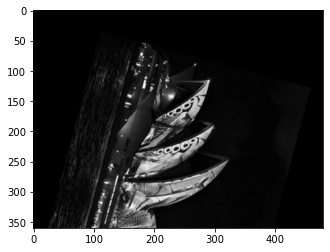

In [17]:
plt.imshow(rotated)
cv2.imwrite("Rotated.jpg",rotated)

In [18]:
#feature_key_point extraction from the image

default_sift = cv2.xfeatures2d.SIFT_create(
            nfeatures=176,
            nOctaveLayers=3,
            contrastThreshold=0.06,
            edgeThreshold=10,
            sigma=1.6
)

176


True

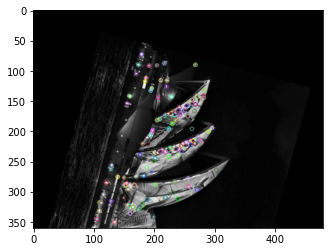

In [19]:
key_points_2, descriptor_2 = default_sift.detectAndCompute(rotated,None)

print(len(key_points_2))

q2_result = cv2.drawKeypoints(rotated,key_points_2,gray)

plt.imshow(q2_result)

cv2.imwrite("Q2_output.jpg",q2_result)

In [20]:
#Question 3: The image needs to be rotated in increments of 60 degrees
#i am using the Brute Force matcher for the CV library

#here we will use output image of q1 with our created feature list.

#Note :: - The lines being created are too many, now if one wishes to reduce the number of line, one can limit the sorted lines
           #by using the good[:50] and that will reduce the number of lines, giving more clarity to the image.

In [21]:
def knn_image_map(input_image,gray,rotated_image,input_descriptor,input_keypoints,rotated_key_points,rotated_descriptor):
    
    matcher = cv2.BFMatcher()
    matched = matcher.knnMatch(input_descriptor,rotated_descriptor,k=2)
    
    #This is refering the OpenCV tutorial -> https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
    
    good = []
    for m, n in matched:
        if m.distance < 0.75*n.distance:
            good.append([m])
    good = sorted(good, key = lambda x:x[0].distance)
    
    nearest = cv2.drawMatchesKnn(gray,input_key_points,rotated_image,rotated_key_points,good,None)
    
    return nearest
    

In [22]:
#we are using the result of question 1 for this task.

#reading a clean image again, and then running q1 again
q3_input = cv2.imread("syd_house.jpg")
gray = cv2.cvtColor(q2_input,cv2.COLOR_BGR2GRAY)

input_key_points, input_descriptor = default_sift.detectAndCompute(q3_input ,None)

#this is the image rotated at 0 degree angle
rotated_0  = rotated_image(q3_input,0)

#using our defination of default_sift
key_points_0, descriptor_0 = default_sift.detectAndCompute(rotated_0,None)

In [23]:
#calling our KNN image function
knn_image_0 = knn_image_map(q3_input,gray,rotated_0,input_descriptor,input_key_points,key_points_0,descriptor_0)

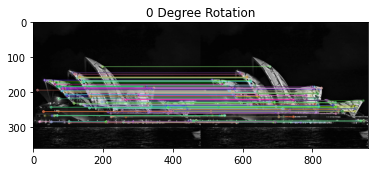

In [24]:
#Printing the image with 0 degree rotation
plt.title("0 Degree Rotation")
plt.imshow(knn_image_0)


In [25]:
cv2.imwrite("KNN_Image_zero_degree.jpg",knn_image_0)

True

In [26]:
#for the image having 60 degrees

rotated_60  = rotated_image(q3_input,60)

#using our defination of default_sift
key_points_60, descriptor_60 = default_sift.detectAndCompute(rotated_60,None)

#using the knn image with the 60 degree
knn_image_60 = knn_image_map(q3_input,gray,rotated_60,input_descriptor,input_key_points,key_points_60,descriptor_60)

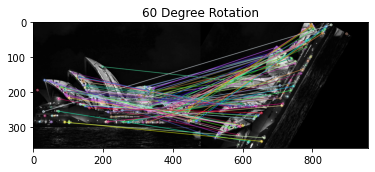

In [27]:
#plotting the joined image with 60 degree rotation
plt.title("60 Degree Rotation")
plt.imshow(knn_image_60)


In [28]:
#KNN image with 60 degrees 
cv2.imwrite("KNN_Image_sixty_degree.jpg",knn_image_60)

True

In [29]:
rotated_120  = rotated_image(q3_input,120)

#using our defination of default_sift
key_points_120, descriptor_120 = default_sift.detectAndCompute(rotated_120,None)

#KNN image function for the 120 degree image
knn_image_120 = knn_image_map(q3_input,gray,rotated_120,input_descriptor,input_key_points,key_points_120,descriptor_120)

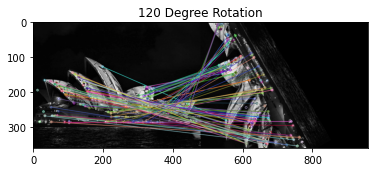

In [30]:
#showing the image on the screen
plt.title("120 Degree Rotation")
plt.imshow(knn_image_120)

In [31]:
#writing the image to the file.
cv2.imwrite("KNN_image_120_degree.jpg",knn_image_120)

True

# Observations


<ol>
    <li> From the above set of images it is clear that SIFT is invariant to rotation.</li>
    <li> The similarity of the key points is visible from the BF matcher which draws the lines between the images.</li>
    <li> Also, the number of drawn lines can be reduced by specifying the good[:#number of lines] parameter. </li>
</ol>

# References

Following are the referneces that were used for this task
 
1.SIFT parameter values were checked from this documentation :: https://docs.opencv.org/3.4/d7/d60/classcv_1_1SIFT.html 

2.For KNN task of q3 this documentation was referenced :: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html 
